Found 5454 images belonging to 9 classes.
Found 1776 images belonging to 9 classes.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 112, 112, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 56, 56, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 64)          18496     
                                    

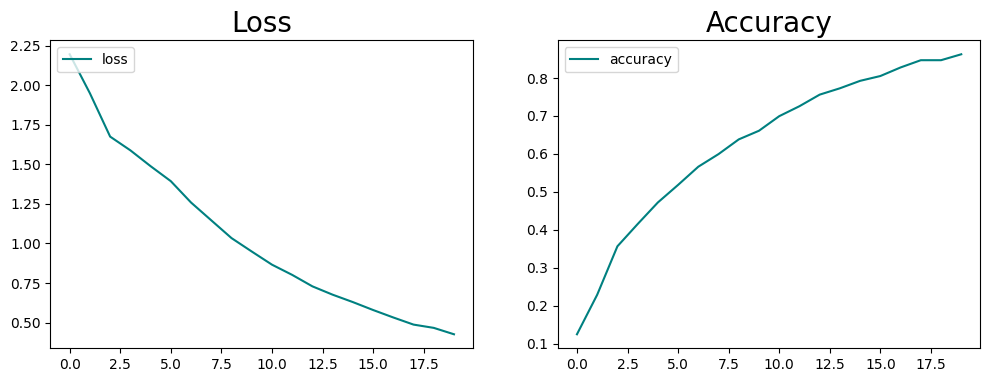

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

classes = ["D", "E", "F", "G", "H", "I", "J", "K", "L"]

img_size = (224, 224)
batch_size = 5

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False
)

training_set_generator = train_datagen.flow_from_directory(
    'D:\\Seminar\\Code\\Data2-Train',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    classes=classes
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_set_generator = test_datagen.flow_from_directory(
    'D:\\Seminar\\Code\\Data2-Test',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    classes=classes,
    shuffle=False
)

training_set_dataset = tf.data.Dataset.from_generator(
    lambda: training_set_generator,
    output_signature=(
        tf.TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(None, len(classes)), dtype=tf.float32)
    )
)

total_train_samples = len(training_set_generator.filenames)
steps_per_epoch = total_train_samples // batch_size

test_dataset = tf.data.Dataset.from_generator(
    lambda: test_set_generator,
    output_signature=(
        tf.TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(None, len(classes)), dtype=tf.float32)
    )
)

def preprocess_images(x, y):
    return x / 255, y

training_set_dataset = training_set_dataset.map(preprocess_images)
test_dataset = test_dataset.map(preprocess_images)

model = Sequential()
model.add(Conv2D(16, (3, 3), strides=2, padding='same', activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3, 3), strides=2, padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3, 3), strides=2, padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(len(classes), activation='softmax'))

learning_rate = 0.0001

optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss=tf.losses.CategoricalCrossentropy(), metrics=['accuracy'])

model.summary()

logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

hist = model.fit(
    training_set_dataset,
    epochs=20,
    steps_per_epoch=steps_per_epoch,
    validation_data=test_dataset,
    validation_steps=len(test_set_generator),
    callbacks=[tensorboard_callback]
)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

axes[0].plot(hist.history['loss'], color='teal', label='loss')
axes[0].set_title('Loss', fontsize=20)
axes[0].legend(loc="upper left")

axes[1].plot(hist.history['accuracy'], color='teal', label='accuracy')
axes[1].set_title('Accuracy', fontsize=20)
axes[1].legend(loc="upper left")

plt.show()

In [8]:
model.save('file_name.h5')

c:\Program Files\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
